<a href="https://colab.research.google.com/github/MariaNatiele/Redes_Neurais/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning -> Iremos verificar caracteres digitados

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

In [ ]:
#Carrega e faz a separação entre treino e teste
(x_treino, y_treino),(x_teste, y_teste) = mnist.load_data()

In [ ]:
#Visualizando o y_teste
#x_treino[21]

Text(0.5, 1.0, '0')

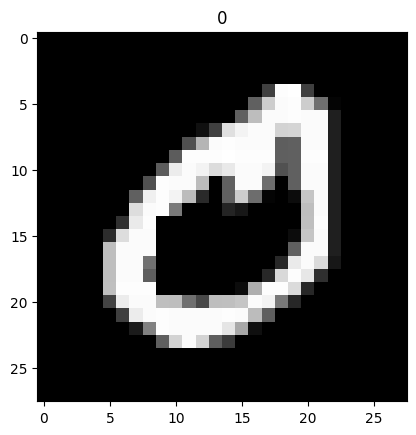

In [ ]:
#Visualizando a imagem
plt.imshow(x_treino[21], cmap='gray')
plt.title(y_treino[21])

In [ ]:
#Mudança da dimensão de uma matriz 28/28 para vetor 784
x_treino = x_treino.reshape(len(x_treino), np.prod(x_treino.shape[1:]))

#Fazer com o teste
x_teste = x_teste.reshape(len(x_teste), np.prod(x_teste.shape[1:]))

In [ ]:
#x_teste[0]

In [ ]:
#Transforma em float, para normalizar os dados
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

In [ ]:
#Normalização(255 valor máximo)
x_treino / - 255
x_teste /- 255

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]], dtype=float32)

In [ ]:
#Transformando para dammy (Temos 10 classes)
y_treino = np_utils.to_categorical(y_treino, 10)

y_teste = np_utils.to_categorical(y_teste, 10)

In [ ]:
#O 1 do vetor é a imagem
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
x_teste

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#Criando a estrutura da rede neural, 784 64 - 64 -64 -64
#Dropaut é usado para zerar uma porcentagem do neurônio, para evitar ouverfitting
rede = Sequential()
rede.add(Dense(units = 64, activation='relu', input_dim = 784 ))
rede.add(Dropout(0,2))
rede.add(Dense(units = 64, activation='relu'))
rede.add(Dropout(0,2))
rede.add(Dense(units = 64, activation='relu'))
rede.add(Dropout(0,2))
rede.add(Dense(units = 10, activation='softmax'))

In [ ]:
#Visualizo a rede
rede.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [ ]:
#Parâmetros da rede neural e treinamento utilizando (base de dados de validação)
#Históricas de execução (error e acuracy)

rede.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#Treino da rede neural, minimo de epochs é 100, 500 ou até 1000

historico = rede.fit(x_treino, y_treino, epochs=20, validation_data=(x_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0303 - accuracy: 0.8174 - val_loss: 0.3276 - val_accuracy: 0.9122
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3025 - accuracy: 0.9196 - val_loss: 0.2700 - val_accuracy: 0.9297
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2262 - accuracy: 0.9365 - val_loss: 0.2067 - val_accuracy: 0.9421
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1829 - accuracy: 0.9486 - val_loss: 0.1755 - val_accuracy: 0.9510
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1606 - accuracy: 0.9549 - val_loss: 0.1674 - val_accuracy: 0.9539
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1412 - accuracy: 0.9595 - val_loss: 0.1595 - val_accuracy: 0.9567
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1272 - accuracy: 0.9639 - val_loss: 0.1564 - val_accuracy:

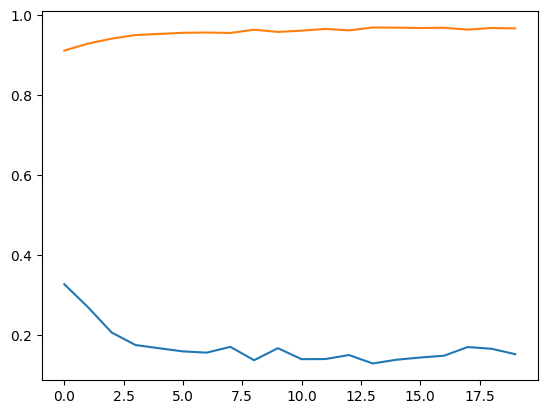

In [ ]:
#Visualizando os dados mostra as chaves da rede keys()
historico.history.keys()

plt.plot(historico.history['val_loss'])

plt.plot(historico.history['val_accuracy'])

In [ ]:
#Previsãos
previsao = rede.predict(x_teste)

313/313 [==============================] - 1s 3ms/step


In [ ]:
#previsao

In [ ]:
#Valor maximo com a probabilidade maior por serem 10 saidas
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsao]

In [ ]:
#Matriz confusão
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz )
confusao

array([[ 966,    1,    3,    1,    0,    2,    4,    1,    2,    0],
       [   0, 1124,    4,    2,    0,    1,    1,    1,    2,    0],
       [   4,    0, 1005,    4,    3,    0,    0,   11,    5,    0],
       [   0,    0,   15,  970,    0,    3,    0,    8,    9,    5],
       [   3,    5,    3,    0,  942,    0,    6,    5,    7,   11],
       [   2,    1,    0,   18,    0,  854,    1,    1,   12,    3],
       [   7,    3,    1,    0,    2,   22,  918,    0,    5,    0],
       [   0,    3,   10,    1,    0,    0,    0, 1001,    3,   10],
       [   3,    1,    9,    2,    5,    7,    0,    4,  939,    4],
       [   1,    9,    1,    7,   13,    4,    0,    9,    6,  959]])

In [ ]:
#Previsão usando apenas um dígito
y_treino[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
novo = y_treino[20]

#Matriz para vetor
novo = np.expand_dims(novo, axis=0)

#Previsão
#pred = rede.predict(novo)

#maior valor
#pred = [np.argmax(pred) for t in pred]
#pred